## EDA on Different Variations of  Dataset

## Operations done on different df's
df - cleaned>scaled

df1 - cleaned> scaled> NearMiss Undersample

df2 - cleaned> scaled> SMOTE Oversample

df3 - cleaned> scaled> train-test split> NearMiss Undersample

df4 - cleaned> scaled> train-test split> SMOTE Oversample

In [1]:
#Import relevant Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()

In [2]:
# Let's start with the cleaned df without oversampled or undersampled data
df = pd.read_csv("df_scaled_inputs.csv")

In [3]:
df.head()

aluminium   ammonia   arsenic    barium   cadmium  chloramine  chromium  \
0   0.777403 -0.585491 -0.480875  1.054205 -0.993241   -0.711941  2.152993   
1   1.306945  0.775118 -0.599632  1.432447 -1.131948    1.208552  1.598765   
2   0.271572 -0.029083 -0.480875 -0.812340 -0.965499    0.803417  1.044536   
3   0.548198 -0.332067 -0.480875  1.144654 -1.159690    1.968179 -0.802892   
4   0.200439  1.132165 -0.520460 -1.124801 -1.020982    0.191820  1.635713   

     copper  flouride  bacteria  ...      lead  nitrates  nitrites   mercury  \
0 -0.973050 -1.657446 -0.363345  ... -0.781070  1.129767 -0.348629  0.609178   
1 -0.223303  0.294799  1.002460  ...  0.009785 -1.409197  1.046960 -0.739005   
2 -1.202564  0.501507 -0.818614  ... -0.368450  0.783298 -0.383518  0.272132   
3  1.306793  0.708215  1.184567  ... -1.434385 -1.517469 -0.069511 -0.401960   
4 -0.361012 -0.371261 -0.575804  ...  0.302058 -0.555658 -0.383518 -0.739005   

   perchlorate    radium  selenium    silver   uranium  is_safe  
0     1.203362  1.661842  1.053694  1.338736 -0.917040        1  
1     0.892977  0.124811  1.053694  0.851134  0.198023        1  
2     1.911763  1.786699  0.706129  2.035310 -1.288728        0  
3    -0.415275 -0.516695 -1.031700  2.104968  0.198023        1  
4     0.024578 -0.219622 -1.031700 -0.611672 -0.917040        1  

[5 rows x 21 columns]

In [4]:
df.describe(include="all").transpose()

count          mean       std       min       25%       50%  \
aluminium    7996.0 -2.852480e-14  1.000063 -0.526693 -0.495079 -0.471368   
ammonia      7996.0 -2.844148e-16  1.000063 -1.617212 -0.867356 -0.016694   
arsenic      7996.0 -3.571902e-15  1.000063 -0.639217 -0.520460 -0.441289   
barium       7996.0  7.423332e-16  1.000063 -1.289254 -0.828785 -0.310757   
cadmium      7996.0 -1.105343e-15  1.000063 -1.187431 -0.965499 -0.077771   
chloramine   7996.0  3.124342e-16  1.000063 -0.848285 -0.809330 -0.641822   
chromium     7996.0 -1.908484e-15  1.000063 -0.913738 -0.728995 -0.581200   
copper       7996.0 -2.571174e-16  1.000063 -1.233166 -1.095458 -0.085594   
flouride     7996.0  1.188672e-16  1.000063 -1.772284 -0.836355 -0.003780   
bacteria     7996.0 -1.425934e-15  1.000063 -0.970370 -0.970370 -0.302643   
viruses      7996.0 -9.988397e-16  1.000063 -0.869387 -0.864097 -0.848228   
lead         7996.0  1.699491e-16  1.000063 -1.709466 -0.884225  0.044170   
nitrates     7996.0  1.051352e-16  1.000063 -1.771906 -0.869645  0.019985   
nitrites     7996.0  6.600662e-16  1.000063 -2.319897 -0.575412  0.157272   
mercury      7996.0 -1.081898e-16  1.000063 -1.750143 -0.739005 -0.064914   
perchlorate  7996.0 -2.085764e-16  1.000063 -0.930887 -0.808203 -0.493012   
radium       7996.0  1.448927e-15  1.000063 -1.257225 -0.904182 -0.219622   
selenium     7996.0  1.943862e-18  1.000063 -1.726831 -1.031700  0.010997   
silver       7996.0 -1.766054e-15  1.000063 -1.029616 -0.750986 -0.472357   
uranium      7996.0 -8.811597e-17  1.000063 -1.660415 -0.917040  0.198023   
is_safe      7996.0  1.140570e-01  0.317900  0.000000  0.000000  0.000000   

                  75%       max  
aluminium   -0.305392  3.464632  
ammonia      0.884654  1.752774  
arsenic     -0.243361  3.517278  
barium       0.752022  2.772741  
cadmium      0.754475  2.418966  
chloramine   0.803417  2.533030  
chromium     0.711999  2.411633  
copper       0.893667  1.827026  
flouride     0.891956  1.672854  
bacteria     0.881055  2.064753  
viruses      0.982026  1.775489  
lead         0.886603  1.729036  
nitrates     0.864502  1.806463  
nitrites     0.750397  2.791445  
mercury      0.946224  1.620315  
perchlorate  0.736230  2.461862  
radium       0.753401  2.182796  
selenium     0.706129  1.748826  
silver       0.642162  2.453255  
uranium      0.941398  1.684773  
is_safe      0.000000  1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [6]:
def skew_count(df):
    dict_unicount = {}
    for i in list(df.columns):
        dict_unicount[i] = df[i].value_counts().shape[0]

    df_unique_count = pd.DataFrame(dict_unicount,index=["unique count"]).transpose()

    dict_skew = {}
    for i in list(df.columns):
        dict_skew[i] = df[i].skew()
    df_skew = pd.DataFrame(dict_skew,index=["skew"]).transpose()
    return(df_skew.join(df_unique_count))
skew_count(df)

skew  unique count
aluminium    2.013463           495
ammonia      0.026804          2563
arsenic      1.985241           107
barium       0.660957           480
cadmium      0.478226            23
chloramine   0.888123           812
chromium     1.028188            91
copper       0.253558           201
flouride    -0.039733           151
bacteria     0.554417           101
viruses      0.424567            61
lead        -0.060601           200
nitrates    -0.042060          1803
nitrites    -0.498212           280
mercury     -0.081726            11
perchlorate  0.937767          2999
radium       0.548391           735
selenium     0.010495            11
silver       1.029489            51
uranium     -0.027040            10
is_safe      2.428682             2

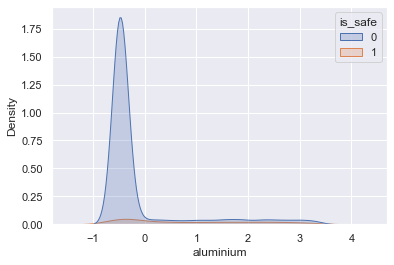

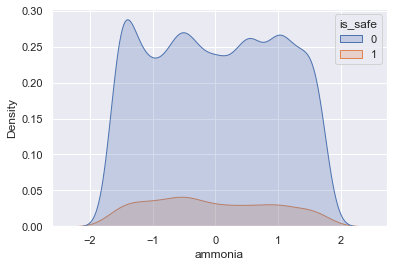

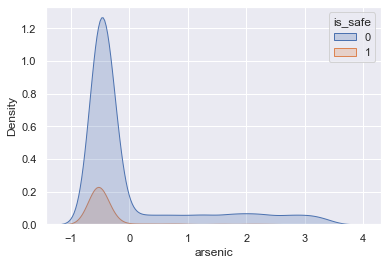

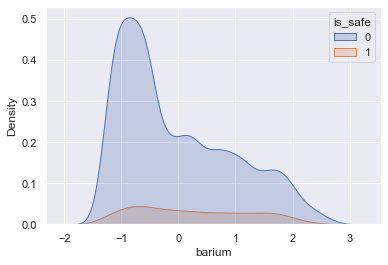

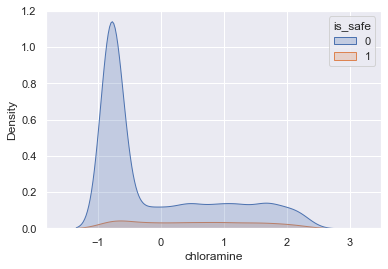

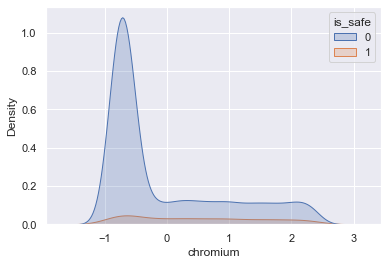

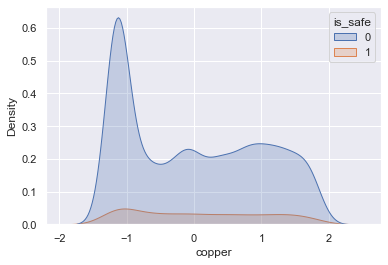

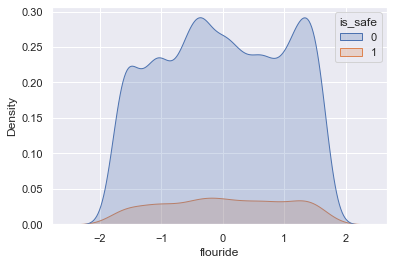

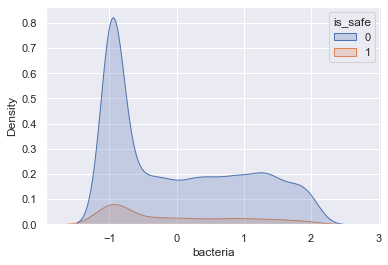

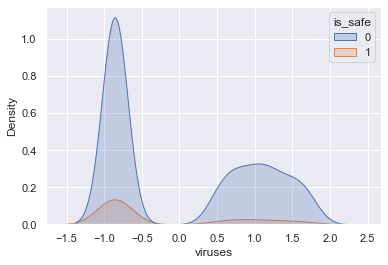

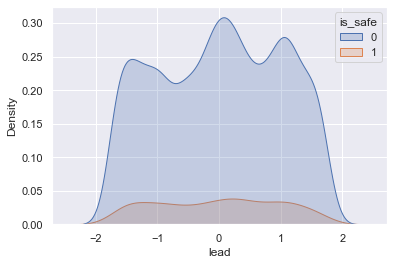

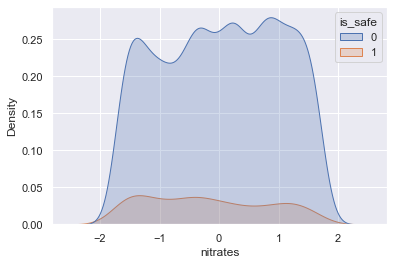

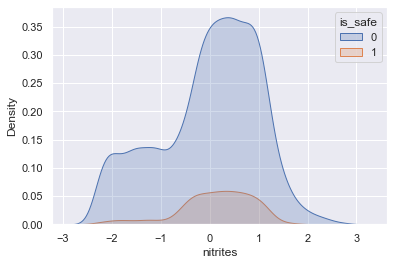

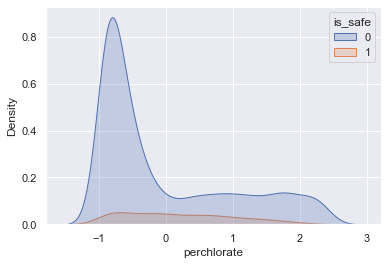

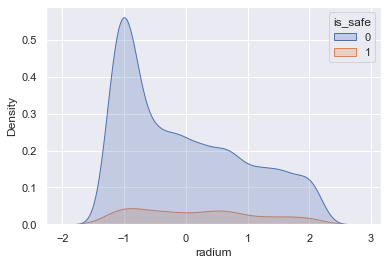

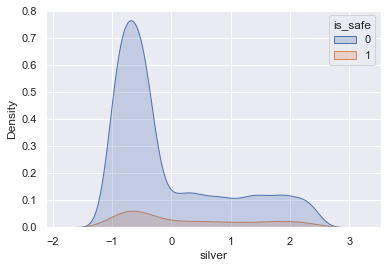

In [7]:
def kdeplots(df,y):
    for i in range(len(df.columns)):
        if len(df[df.columns[i]].unique())>50:
            sns.kdeplot(df[df.columns[i]],shade=True,hue=y)
            plt.show()
kdeplots(df,df["is_safe"])

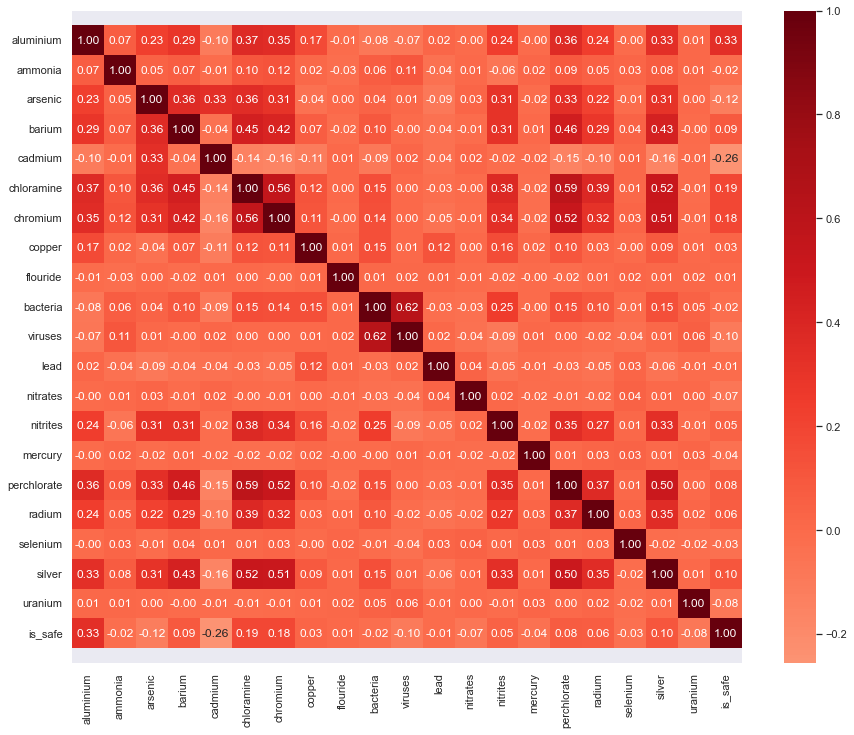

In [8]:
def heatmaps(df):
    fig, ax = plt.subplots(figsize=(15,12))
    sns.heatmap(df.corr(), center=0, cmap='Reds',annot=True, fmt=".2f")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
heatmaps(df)

In [9]:
class corplotsss():
    
        
    def high_corr(self,df):
        self.df = df
    
        # Correlation tells relation between two attributes.
        # Correlation requires continous self.df. 

        #sets the number of features considered
        size = len(self.df.columns)

        #create a self.dfframe with only 'size' features
        # self.df=self.dfset.iloc[:,:size] 

        #get the names of all the columns
        self.cols=self.df.columns 

        # Calculates pearson co-efficient for all combinations
        self.df_corr = self.df.corr()

        # Set the threshold to select only only highly correlated attributes
        threshold = 0.5

        # List of pairs along with correlation above threshold
        corr_list = []

        #Search for the highly correlated pairs
        for i in range(0,size): #for 'size' features
            for j in range(i+1,size): #avoid repetition
                if (abs(self.df_corr.iloc[i,j] )>= threshold and abs(self.df_corr.iloc[i,j]) < 1):
                    corr_list.append([self.df_corr.iloc[i,j],i,j]) #store correlation and columns index

        #Sort to show higher ones first            
        s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))
        self.s_corr_list = s_corr_list
        #Print correlations and column names
        for v,i,j in s_corr_list:
            print ("%s and %s = %.2f" % (self.cols[i],self.cols[j],v))
    

        # Strong correlation is observed between the following pairs
        # This represents an opportunity to reduce the feature set through transformations such as PCA
        
    def high_corr_plot(self):
        for v,i,j in self.s_corr_list:
            sns.pairplot(df, hue="is_safe", height=6, x_vars=self.cols[i],y_vars=self.cols[j] )
            plt.show()

corplotss = corplotsss()
corplotss.high_corr(df)

bacteria and viruses = 0.62
chloramine and perchlorate = 0.59
chloramine and chromium = 0.56
chromium and perchlorate = 0.52
chloramine and silver = 0.52
chromium and silver = 0.51
perchlorate and silver = 0.50


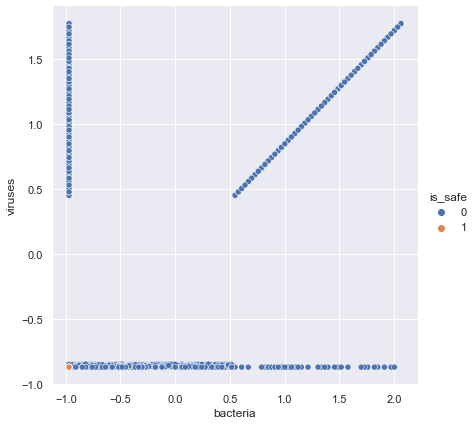

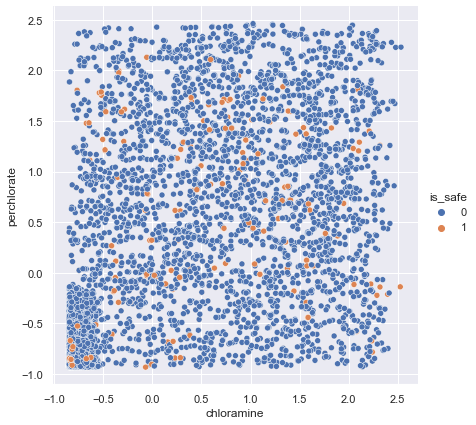

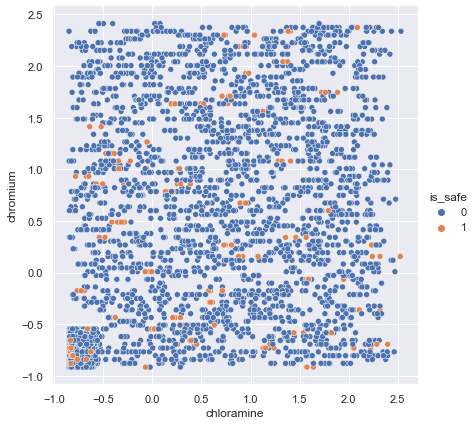

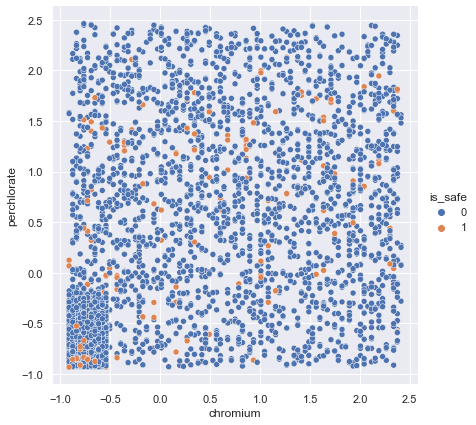

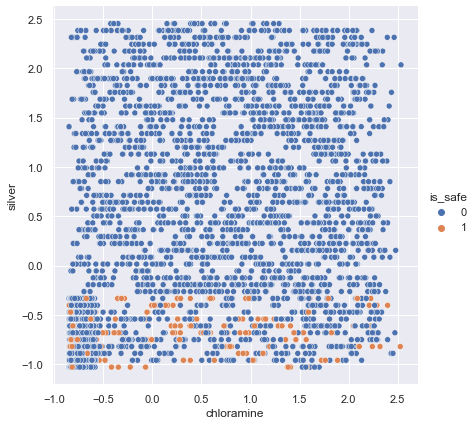

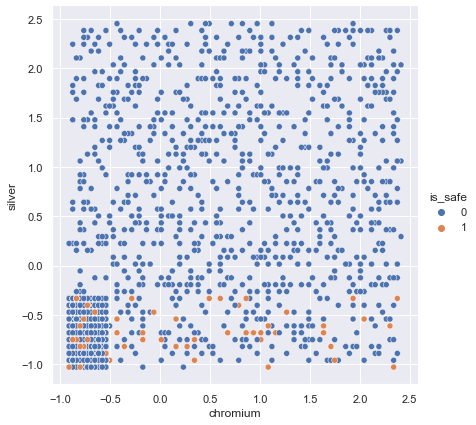

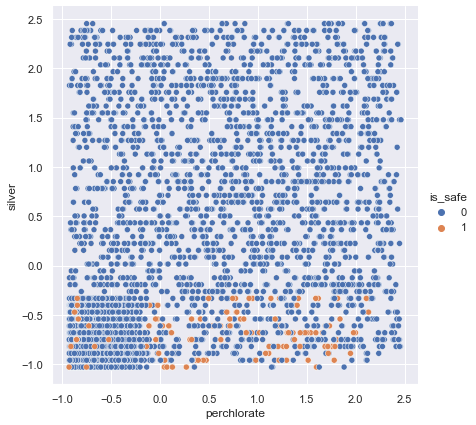

In [10]:
corplotss.high_corr_plot()

In [11]:
# for j in range(0, len(features), 4):  
#     for i, item in enumerate(features[j:j+4],1):
#         plt.subplot(2, 2, i)
#         sns.scatterplot(data=df,x=item, y=item,hue="is_safe")
#     plt.show()

### Do for other df's

In [12]:
df1 = pd.read_csv("df1.csv")
df2 = pd.read_csv("df2.csv")
df3 = pd.read_csv("df3.csv")
df4 = pd.read_csv("df4.csv")

In [13]:
df1.describe(include="all").transpose()

count      mean       std       min       25%       50%  \
aluminium    1824.0  0.242449  1.144557 -0.526693 -0.487175 -0.455561   
ammonia      1824.0 -0.089125  0.958951 -1.609327 -0.887912 -0.198596   
arsenic      1824.0 -0.402272  0.458899 -0.639217 -0.560046 -0.520460   
barium       1824.0 -0.085680  0.949365 -1.289254 -0.845230 -0.425874   
cadmium      1824.0 -0.417163  0.862210 -1.187431 -1.076465 -0.965499   
chloramine   1824.0  0.075349  0.991679 -0.848285 -0.797643 -0.411986   
chromium     1824.0  0.084056  1.010497 -0.913738 -0.728995 -0.507303   
copper       1824.0 -0.200544  0.952113 -1.233166 -1.110759 -0.437516   
flouride     1824.0  0.006520  0.950087 -1.772284 -0.738743  0.019188   
bacteria     1824.0 -0.271659  0.894200 -0.970370 -0.970370 -0.757911   
viruses      1824.0 -0.392367  0.832884 -0.869387 -0.866742 -0.856162   
lead         1824.0 -0.020556  0.944896 -1.709466 -0.849840  0.026978   
nitrates     1824.0 -0.211582  0.962353 -1.771906 -1.053706 -0.277761   
nitrites     1824.0 -0.281900  0.956632 -2.319897 -1.028978 -0.139290   
mercury      1824.0 -0.112403  0.990585 -1.750143 -1.076051 -0.064914   
perchlorate  1824.0 -0.124637  0.800150 -0.930887 -0.785730 -0.440999   
radium       1824.0 -0.076351  0.959080 -1.257225 -0.925709 -0.297119   
selenium     1824.0 -0.098379  0.959229 -1.726831 -1.031700  0.010997   
silver       1824.0 -0.006599  0.998851 -1.029616 -0.750986 -0.472357   
uranium      1824.0 -0.142283  0.962755 -1.660415 -0.917040 -0.173665   
is_safe      1824.0  0.500000  0.500137  0.000000  0.000000  0.500000   

                  75%       max  
aluminium    0.777403  3.425114  
ammonia      0.722180  1.748269  
arsenic     -0.441289  3.438106  
barium       0.595791  2.435612  
cadmium      0.199645  2.418966  
chloramine   0.900805  2.525238  
chromium     0.859793  2.411633  
copper       0.572347  1.811725  
flouride     0.754150  1.672854  
bacteria     0.274030  2.064753  
viruses      0.453051  1.775489  
lead         0.783448  1.729036  
nitrates     0.588861  1.792027  
nitrites     0.453835  2.442548  
mercury      0.609178  1.620315  
perchlorate  0.433336  2.446598  
radium       0.611322  2.156964  
selenium     0.706129  1.748826  
silver       0.642162  2.453255  
uranium      0.569710  1.684773  
is_safe      1.000000  1.000000

In [14]:
skew_count(df1)

skew  unique count
aluminium    1.372320           380
ammonia      0.176817          1176
arsenic      5.266311            71
barium       0.741499           384
cadmium      1.050561            23
chloramine   0.735187           524
chromium     0.855560            91
copper       0.579727           197
flouride    -0.055338           150
bacteria     1.086166           101
viruses      1.343611            61
lead        -0.034520           198
nitrates     0.172052           857
nitrites    -0.366706           217
mercury      0.054948            11
perchlorate  0.963803          1129
radium       0.642534           583
selenium     0.085835            11
silver       1.068536            51
uranium      0.169717            10
is_safe      0.000000             2

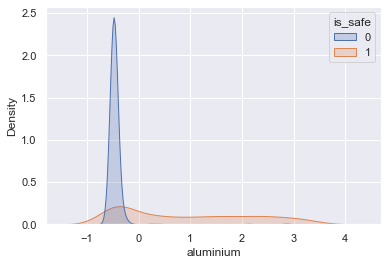

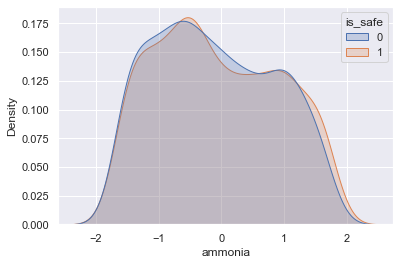

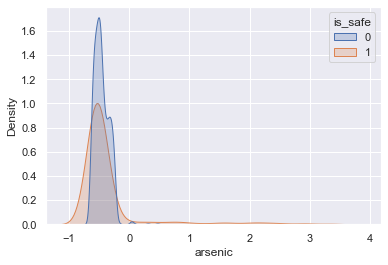

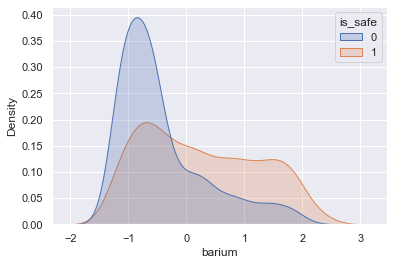

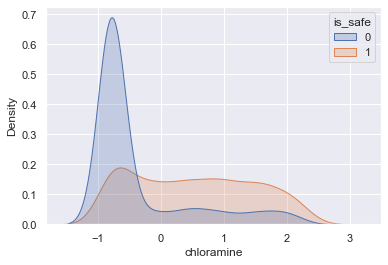

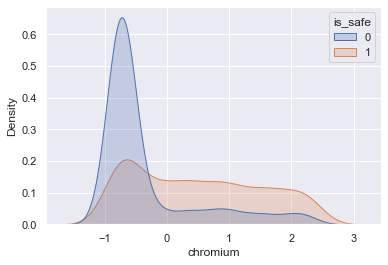

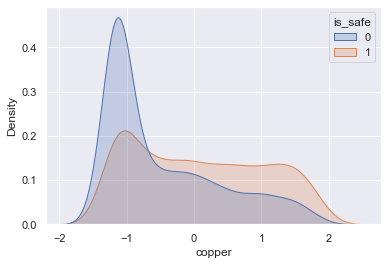

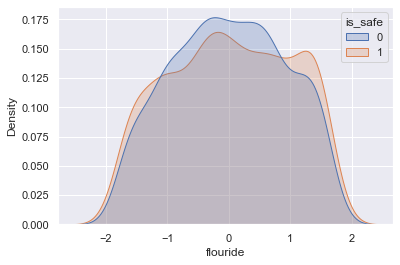

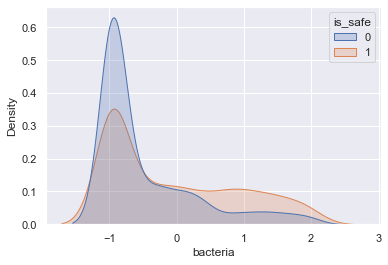

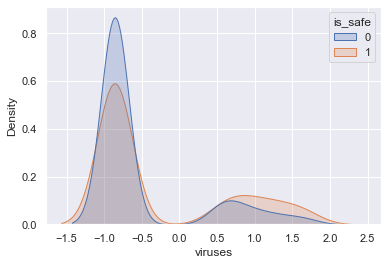

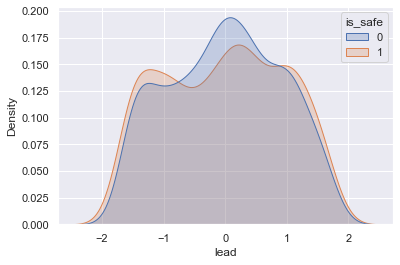

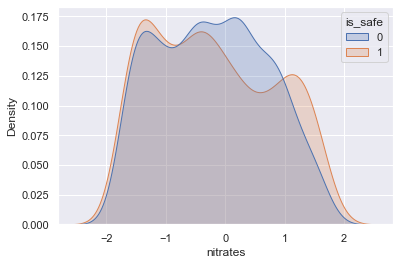

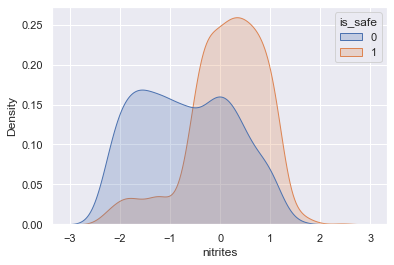

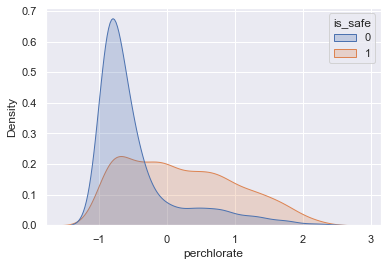

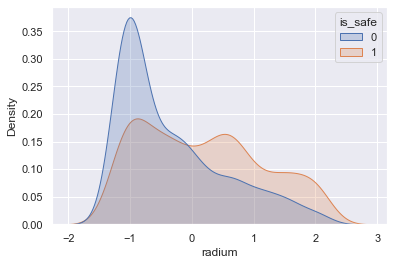

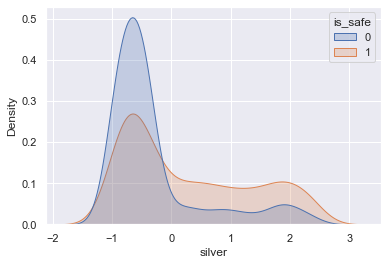

In [15]:
kdeplots(df1,df1["is_safe"])

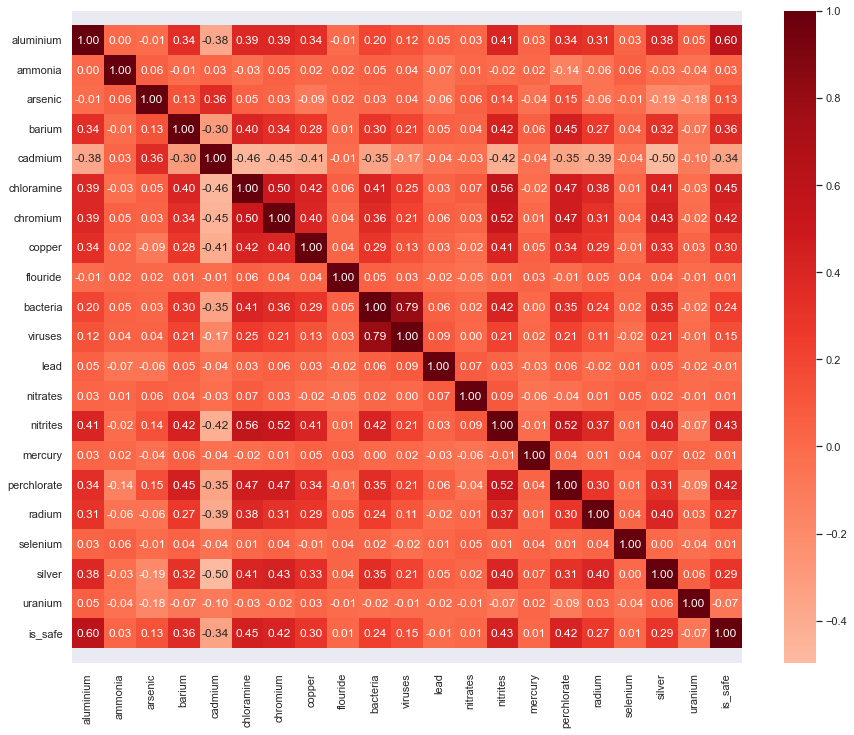

In [16]:
heatmaps(df1)

bacteria and viruses = 0.79
aluminium and is_safe = 0.60
chloramine and nitrites = 0.56
chromium and nitrites = 0.52
nitrites and perchlorate = 0.52
chloramine and chromium = 0.50


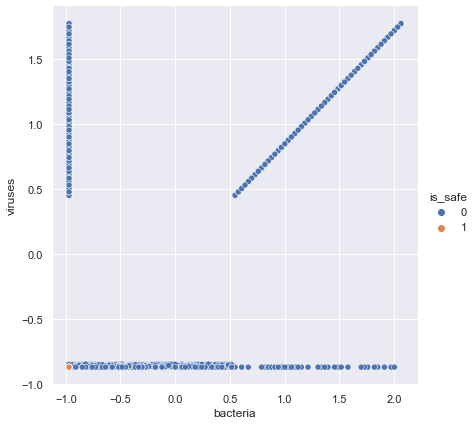

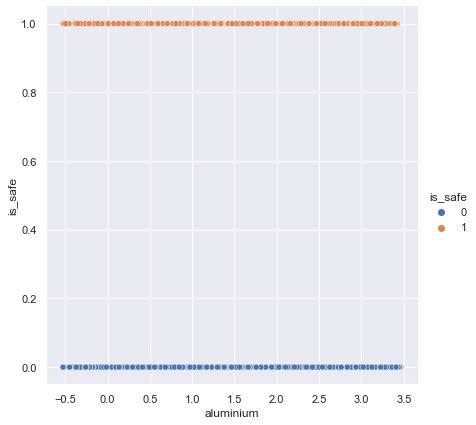

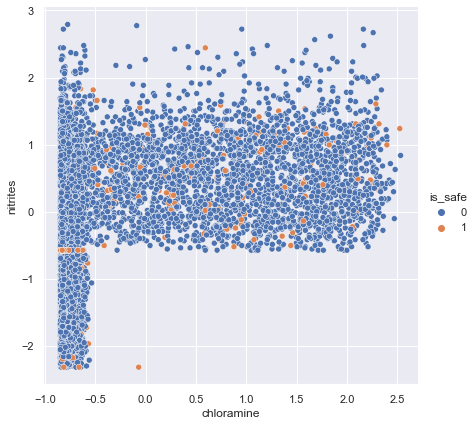

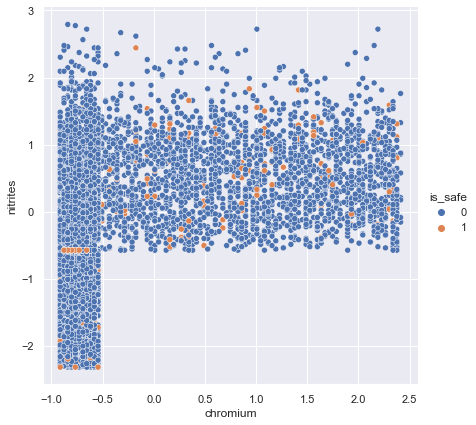

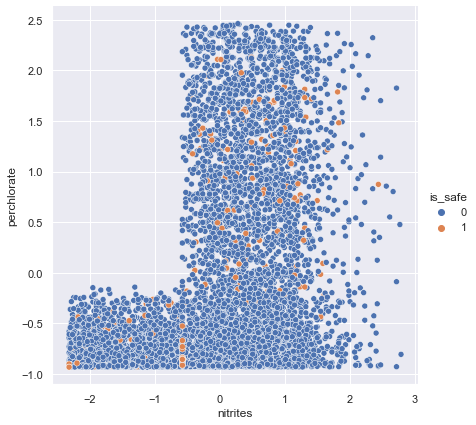

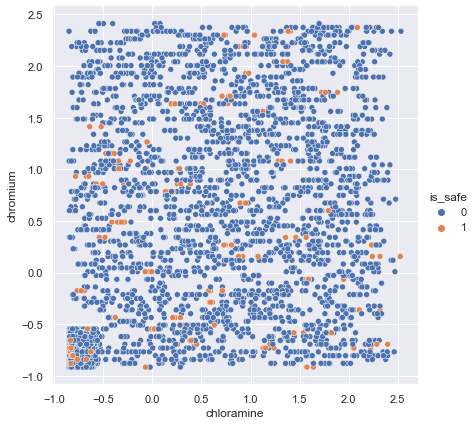

In [17]:
corplots1 = corplotsss()
corplots1.high_corr(df1)
corplots1.high_corr_plot()


In [18]:
df2.describe(include="all").transpose()

count      mean       std       min       25%       50%  \
aluminium    14168.0  0.400622  1.178567 -0.526693 -0.480432 -0.373070   
ammonia      14168.0 -0.023289  0.956215 -1.617212 -0.828347 -0.074136   
arsenic      14168.0 -0.160066  0.854486 -0.639217 -0.560046 -0.480875   
barium       14168.0  0.107349  0.970414 -1.289254 -0.721890 -0.080523   
cadmium      14168.0 -0.324053  0.956358 -1.187431 -1.065398 -0.910016   
chloramine   14168.0  0.232321  0.983434 -0.848285 -0.750897  0.067163   
chromium     14168.0  0.229472  1.009858 -0.913738 -0.692046 -0.063921   
copper       14168.0  0.036103  0.948249 -1.233166 -0.915286 -0.039691   
flouride     14168.0  0.004648  0.955936 -1.772284 -0.761710 -0.000746   
bacteria     14168.0 -0.021085  0.970510 -0.970370 -0.970370 -0.332994   
viruses      14168.0 -0.119601  0.962328 -0.869387 -0.864740 -0.852388   
lead         14168.0 -0.006217  0.955793 -1.709466 -0.832648  0.044170   
nitrates     14168.0 -0.082706  0.977126 -1.771906 -0.933197 -0.122528   
nitrites     14168.0  0.058706  0.884762 -2.319897 -0.339732  0.196550   
mercury      14168.0 -0.047948  0.973159 -1.750143 -0.878961 -0.064914   
perchlorate  14168.0  0.086701  0.893744 -0.930887 -0.714516 -0.145448   
radium       14168.0  0.079907  0.962552 -1.257225 -0.809463 -0.065300   
selenium     14168.0 -0.046787  0.960544 -1.726831 -0.887924  0.010997   
silver       14168.0  0.127308  1.013634 -1.029616 -0.681329 -0.333042   
uranium      14168.0 -0.089151  0.972858 -1.660415 -0.917040 -0.173665   
is_safe      14168.0  0.500000  0.500018  0.000000  0.000000  0.500000   

                  75%       max  
aluminium    1.251788  3.464632  
ammonia      0.819209  1.752774  
arsenic     -0.322532  3.517278  
barium       0.889751  2.772741  
cadmium      0.477060  2.418966  
chloramine   1.061715  2.533030  
chromium     1.050159  2.411633  
copper       0.873337  1.827026  
flouride     0.826885  1.672854  
bacteria     0.850508  2.064753  
viruses      0.864328  1.775489  
lead         0.800641  1.729036  
nitrates     0.761745  1.806463  
nitrites     0.680618  2.791445  
mercury      0.753449  1.620315  
perchlorate  0.732608  2.461862  
radium       0.792149  2.182796  
selenium     0.706129  1.748826  
silver       0.902430  2.453255  
uranium      0.696908  1.684773  
is_safe      1.000000  1.000000

In [19]:
skew_count(df2)

skew  unique count
aluminium    1.037430          6573
ammonia      0.092636          8540
arsenic      2.565346          5259
barium       0.470970          6540
cadmium      1.005903          5388
chloramine   0.454886          6849
chromium     0.582780          5624
copper       0.207827          5978
flouride    -0.053976          5764
bacteria     0.597417          4598
viruses      0.657432          4841
lead        -0.062145          5849
nitrates     0.068536          7858
nitrites    -0.699653          6236
mercury     -0.025015          4766
perchlorate  0.709167          9076
radium       0.439593          6477
selenium     0.048289          4710
silver       0.789561          5479
uranium      0.120865          4512
is_safe      0.000000             2

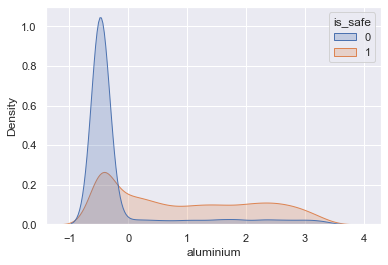

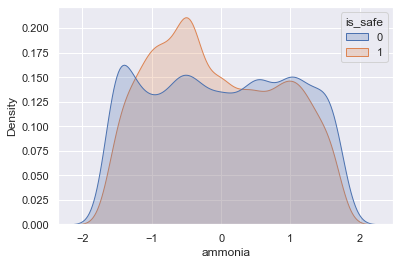

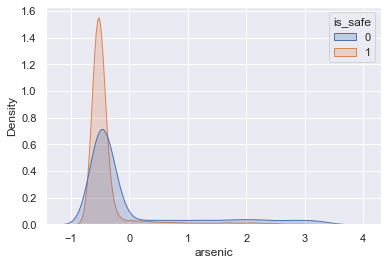

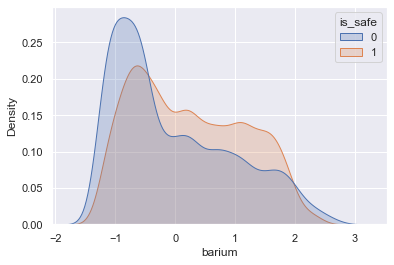

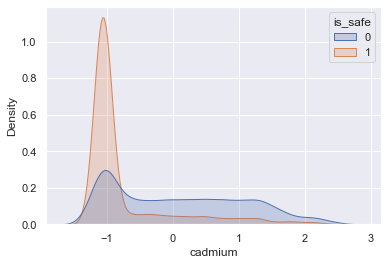

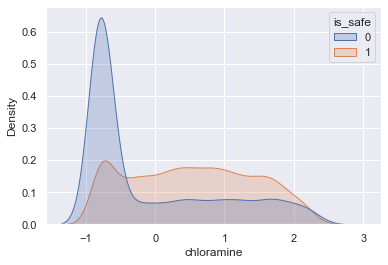

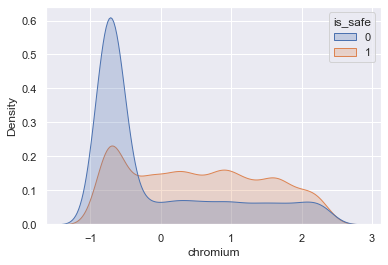

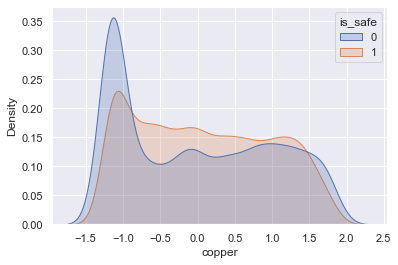

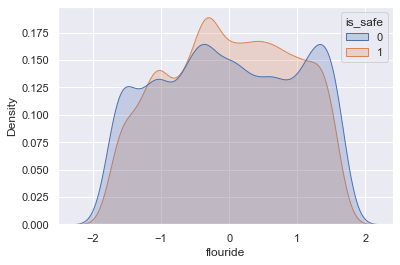

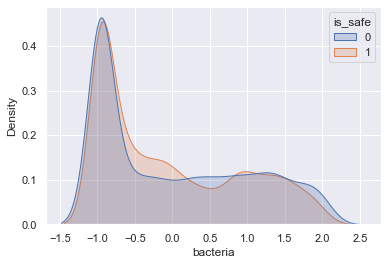

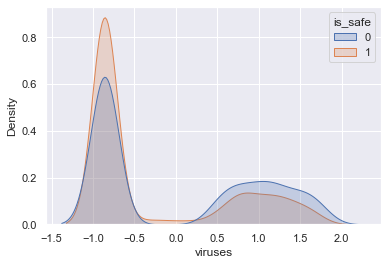

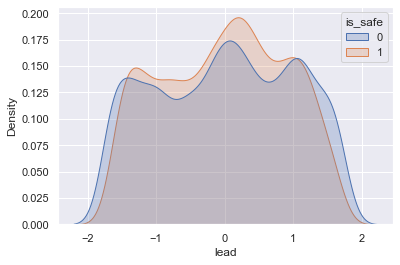

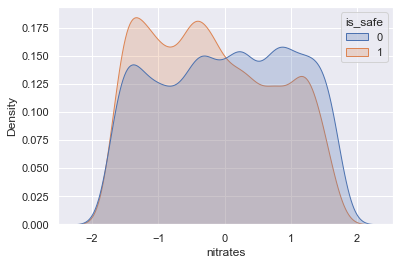

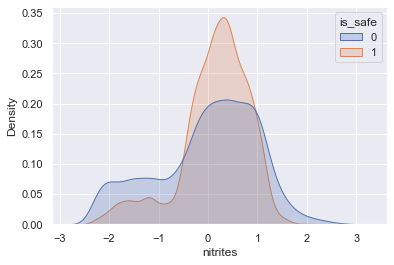

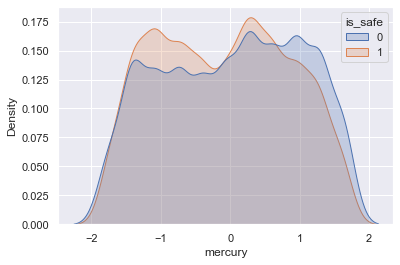

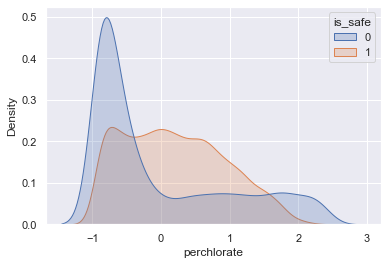

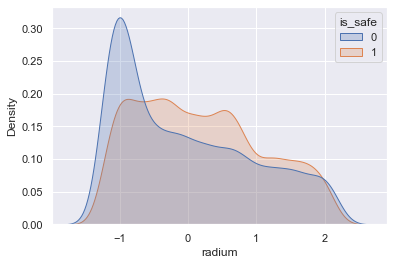

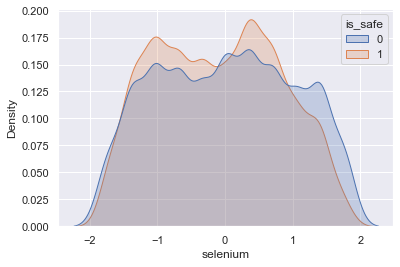

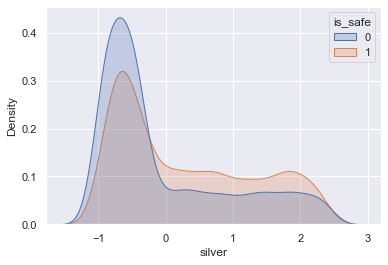

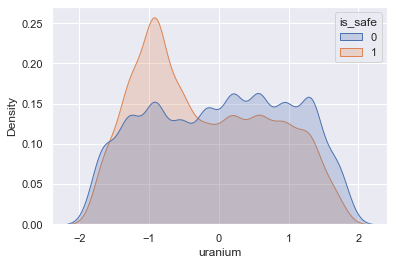

In [20]:
kdeplots(df2,df2["is_safe"])

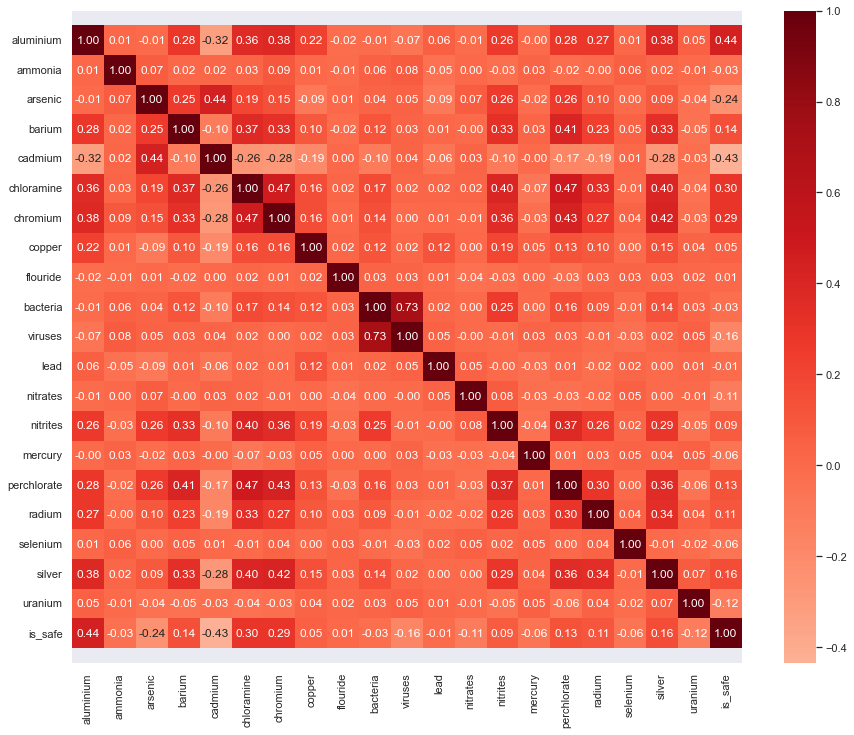

In [21]:
heatmaps(df2)

bacteria and viruses = 0.73


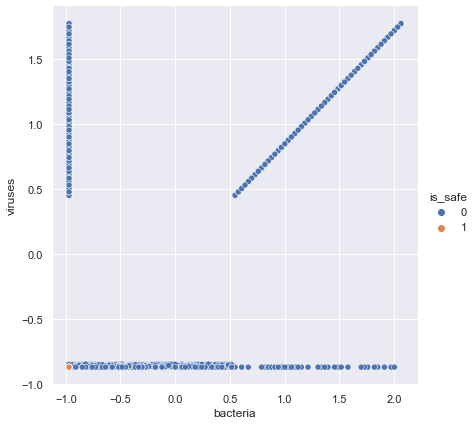

In [22]:
corplots2 = corplotsss()
corplots2.high_corr(df2)
corplots2.high_corr_plot()

In [23]:
df3.describe(include="all").transpose()

count      mean       std       min       25%       50%  \
aluminium    1408.0  0.249966  1.150902 -0.526693 -0.487175 -0.455561   
ammonia      1408.0 -0.077509  0.953016 -1.609327 -0.872143 -0.183391   
arsenic      1408.0 -0.398869  0.453134 -0.639217 -0.560046 -0.480875   
barium       1408.0 -0.096950  0.944690 -1.289254 -0.845230 -0.442320   
cadmium      1408.0 -0.396680  0.871102 -1.187431 -1.076465 -0.937758   
chloramine   1408.0  0.062949  0.997284 -0.848285 -0.797643 -0.503531   
chromium     1408.0  0.061857  1.005332 -0.913738 -0.728995 -0.544252   
copper       1408.0 -0.229497  0.952789 -1.233166 -1.110759 -0.514021   
flouride     1408.0 -0.000681  0.948829 -1.749317 -0.761710  0.007704   
bacteria     1408.0 -0.270309  0.906991 -0.970370 -0.970370 -0.788263   
viruses      1408.0 -0.368369  0.845135 -0.869387 -0.866742 -0.856162   
lead         1408.0  0.005609  0.949453 -1.692273 -0.815455  0.061363   
nitrates     1408.0 -0.168247  0.956495 -1.770102 -1.012653 -0.216407   
nitrites     1408.0 -0.300754  0.971460 -2.319897 -1.063868 -0.156735   
mercury      1408.0 -0.110396  0.982356 -1.750143 -1.076051 -0.064914   
perchlorate  1408.0 -0.157693  0.768553 -0.930321 -0.785588 -0.459091   
radium       1408.0 -0.114084  0.940236 -1.257225 -0.930014 -0.333715   
selenium     1408.0 -0.118106  0.961461 -1.726831 -1.031700  0.010997   
silver       1408.0 -0.021859  0.993309 -1.029616 -0.750986 -0.472357   
uranium      1408.0 -0.145683  0.971894 -1.660415 -0.917040 -0.173665   
is_safe      1408.0  0.500000  0.500178  0.000000  0.000000  0.500000   

                  75%       max  
aluminium    0.818897  3.425114  
ammonia      0.710354  1.748269  
arsenic     -0.401703  3.319349  
barium       0.579346  2.435612  
cadmium      0.199645  2.418966  
chloramine   0.877432  2.525238  
chromium     0.795133  2.411633  
copper       0.526444  1.811725  
flouride     0.754150  1.672854  
bacteria     0.304381  2.064753  
viruses      0.479500  1.775489  
lead         0.783448  1.729036  
nitrates     0.640741  1.792027  
nitrites     0.471279  2.442548  
mercury      0.609178  1.620315  
perchlorate  0.331430  2.446598  
radium       0.555352  2.156964  
selenium     0.706129  1.748826  
silver       0.572505  2.453255  
uranium      0.569710  1.684773  
is_safe      1.000000  1.000000

In [24]:
skew_count(df3)

skew  unique count
aluminium    1.350653           343
ammonia      0.177841           978
arsenic      5.077579            63
barium       0.751940           364
cadmium      1.015480            23
chloramine   0.764440           472
chromium     0.915025            91
copper       0.635282           191
flouride    -0.044266           148
bacteria     1.087834            99
viruses      1.267458            59
lead        -0.078598           198
nitrates     0.125192           761
nitrites    -0.341947           212
mercury      0.070087            11
perchlorate  1.018064           953
radium       0.718593           522
selenium     0.101577            11
silver       1.099751            51
uranium      0.175673            10
is_safe      0.000000             2

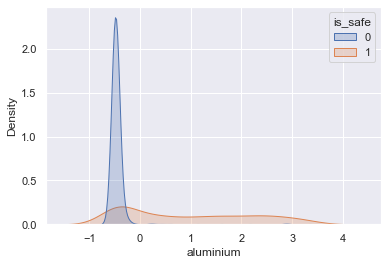

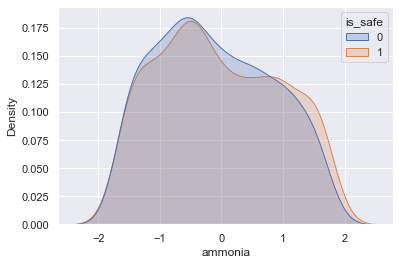

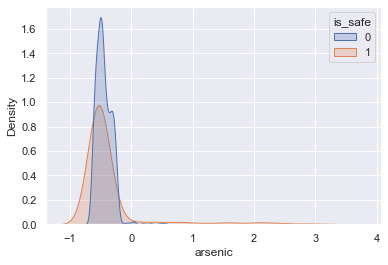

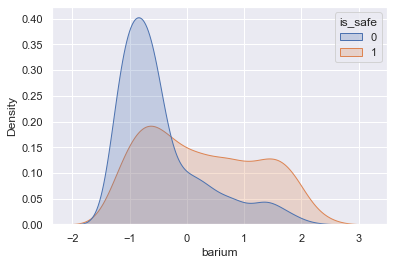

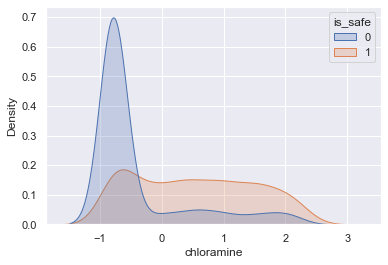

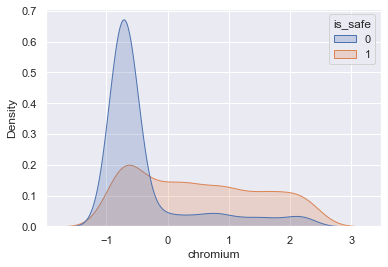

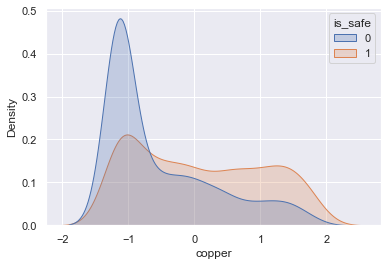

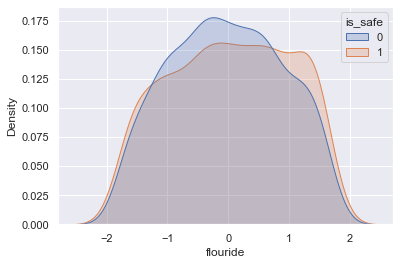

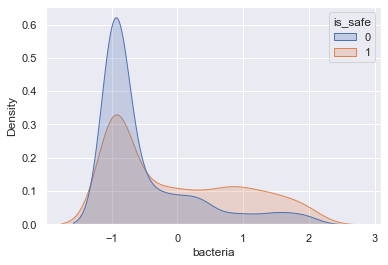

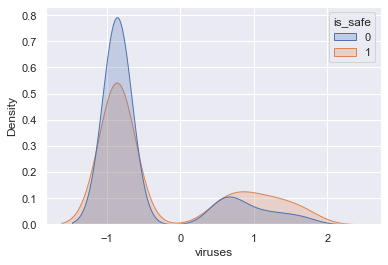

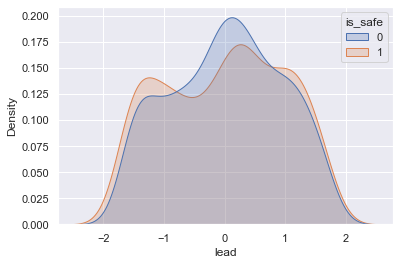

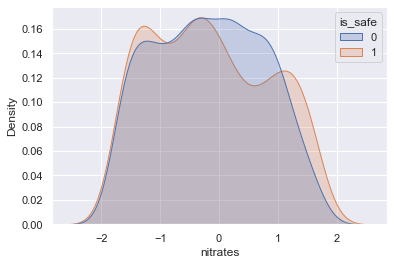

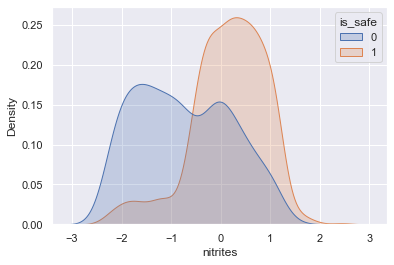

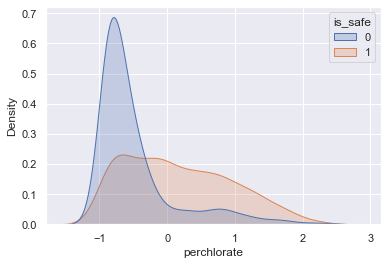

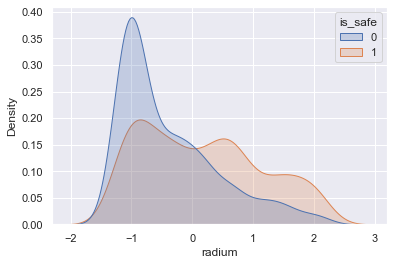

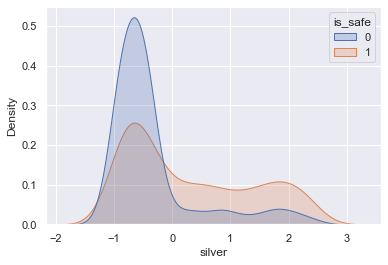

In [25]:
kdeplots(df3,df3["is_safe"])

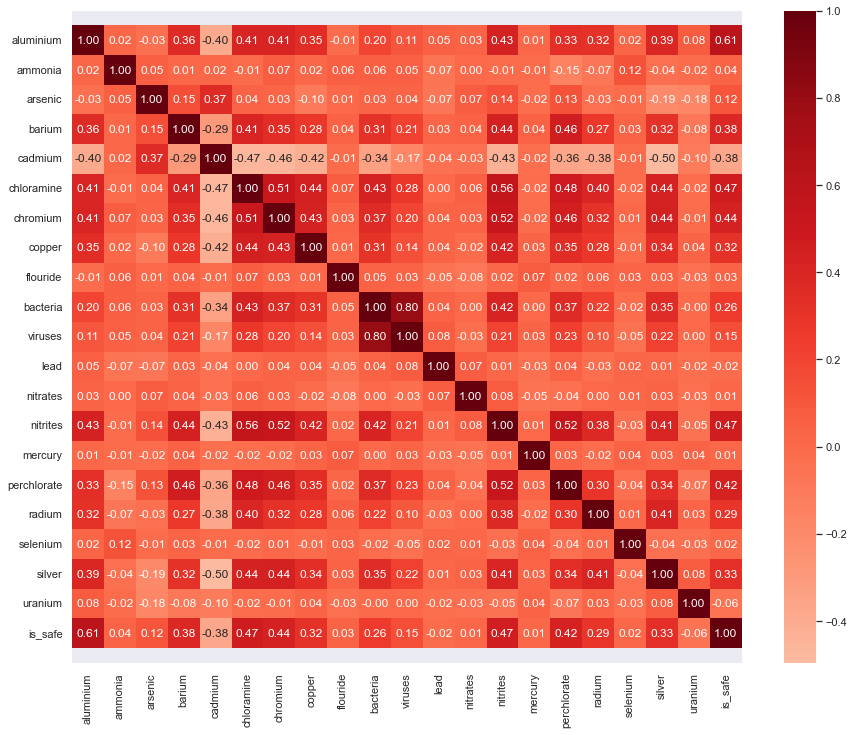

In [26]:
heatmaps(df3)

bacteria and viruses = 0.80
aluminium and is_safe = 0.61
chloramine and nitrites = 0.56
chromium and nitrites = 0.52
nitrites and perchlorate = 0.52
chloramine and chromium = 0.51


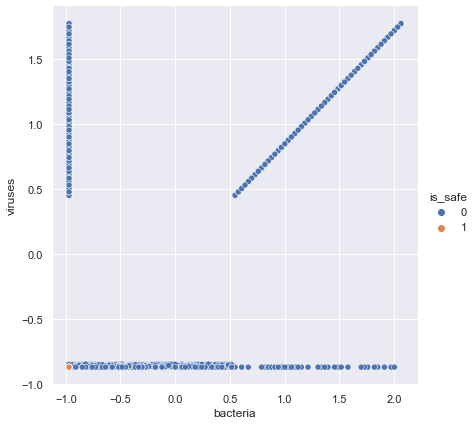

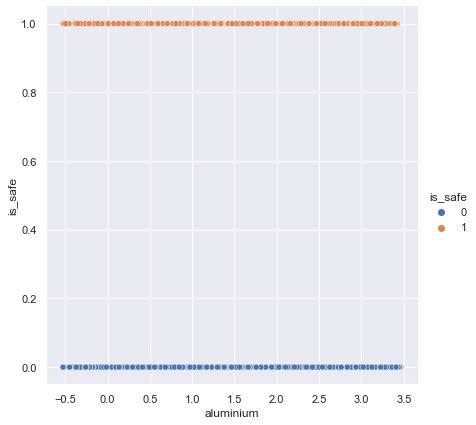

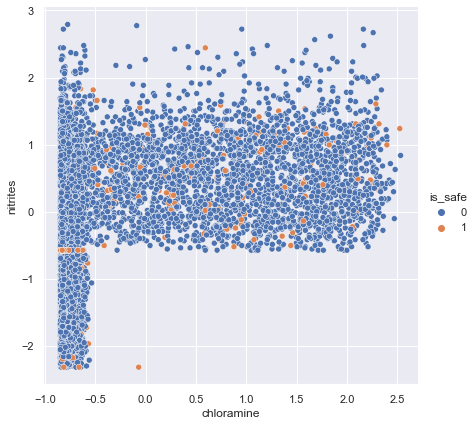

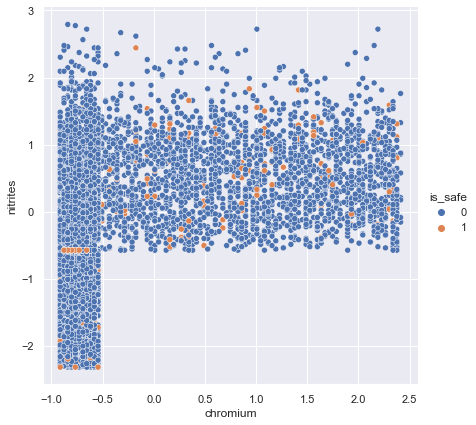

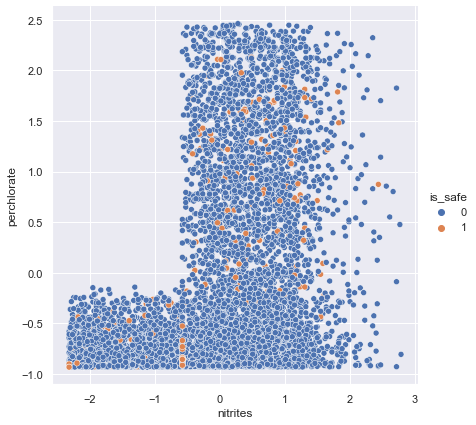

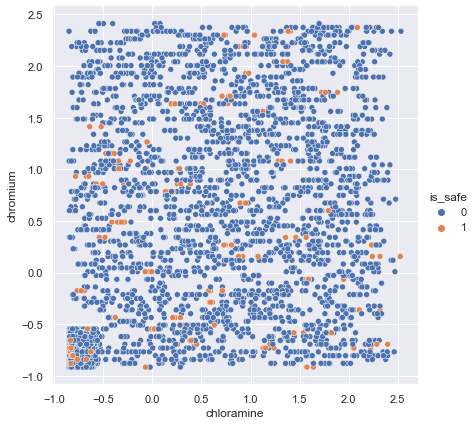

In [27]:
corplots3 = corplotsss()
corplots3.high_corr(df3)
corplots3.high_corr_plot()

In [28]:
df4.describe(include="all").transpose()

count      mean       std       min       25%       50%  \
aluminium    11384.0  0.418234  1.191765 -0.526693 -0.482765 -0.363061   
ammonia      11384.0 -0.013928  0.954092 -1.617212 -0.808505 -0.062701   
arsenic      11384.0 -0.164975  0.848641 -0.639217 -0.560046 -0.480875   
barium       11384.0  0.096766  0.961082 -1.289254 -0.722698 -0.088745   
cadmium      11384.0 -0.329072  0.957553 -1.187431 -1.060646 -0.910016   
chloramine   11384.0  0.220735  0.980659 -0.848285 -0.754792  0.040288   
chromium     11384.0  0.201197  1.000891 -0.913738 -0.692046 -0.137818   
copper       11384.0  0.033322  0.953143 -1.233166 -0.927255 -0.054992   
flouride     11384.0  0.016804  0.950336 -1.772284 -0.738743  0.025139   
bacteria     11384.0 -0.022761  0.973485 -0.970370 -0.970370 -0.339632   
viruses      11384.0 -0.114389  0.960868 -0.869387 -0.864815 -0.852613   
lead         11384.0  0.000656  0.956255 -1.692273 -0.831879  0.061363   
nitrates     11384.0 -0.064777  0.963538 -1.770102 -0.898526 -0.108136   
nitrites     11384.0  0.060616  0.879415 -2.319897 -0.317769  0.203848   
mercury      11384.0 -0.045406  0.961959 -1.750143 -0.809871 -0.064914   
perchlorate  11384.0  0.056895  0.881150 -0.930887 -0.717745 -0.185978   
radium       11384.0  0.071655  0.956283 -1.257225 -0.811472 -0.077543   
selenium     11384.0 -0.047612  0.960602 -1.726831 -0.898111  0.010997   
silver       11384.0  0.130264  1.010477 -1.029616 -0.681329 -0.333042   
uranium      11384.0 -0.084733  0.968993 -1.660415 -0.917040 -0.173665   
is_safe      11384.0  0.500000  0.500022  0.000000  0.000000  0.500000   

                  75%       max  
aluminium    1.311878  3.464632  
ammonia      0.814559  1.752774  
arsenic     -0.322532  3.517278  
barium       0.840415  2.739850  
cadmium      0.434148  2.418966  
chloramine   1.036619  2.533030  
chromium     1.007588  2.411633  
copper       0.878366  1.827026  
flouride     0.844386  1.672854  
bacteria     0.837453  2.064753  
viruses      0.849782  1.775489  
lead         0.784760  1.729036  
nitrates     0.763449  1.806463  
nitrites     0.676595  2.791445  
mercury      0.716415  1.620315  
perchlorate  0.669885  2.461862  
radium       0.781772  2.182796  
selenium     0.706129  1.748826  
silver       0.920792  2.453255  
uranium      0.711261  1.684773  
is_safe      1.000000  1.000000

In [29]:
skew_count(df4)

skew  unique count
aluminium    1.008710          5399
ammonia      0.087890          7323
arsenic      2.569812          4292
barium       0.488268          5407
cadmium      1.029069          4394
chloramine   0.475080          5716
chromium     0.635558          4662
copper       0.214433          4925
flouride    -0.067522          4803
bacteria     0.597748          3684
viruses      0.645827          3907
lead        -0.074800          4858
nitrates     0.066200          6630
nitrites    -0.716115          5136
mercury     -0.018149          3974
perchlorate  0.785169          7653
radium       0.452876          5468
selenium     0.047620          3909
silver       0.766350          4561
uranium      0.108799          3783
is_safe      0.000000             2

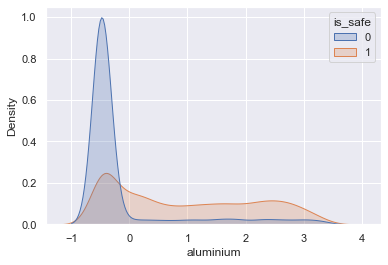

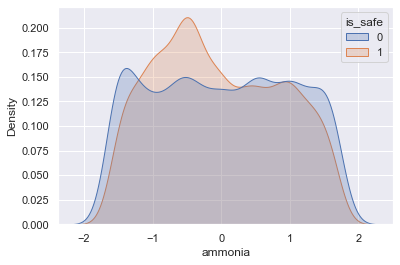

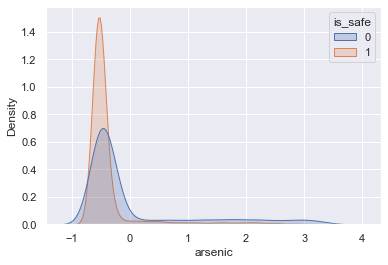

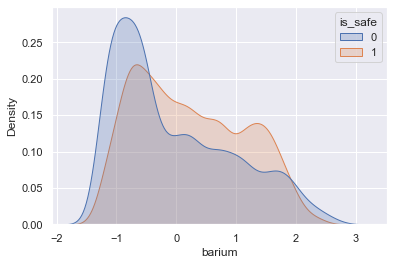

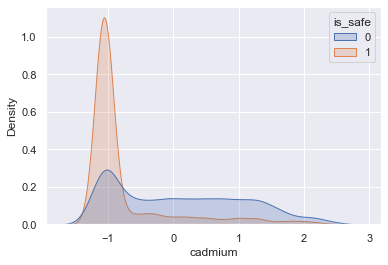

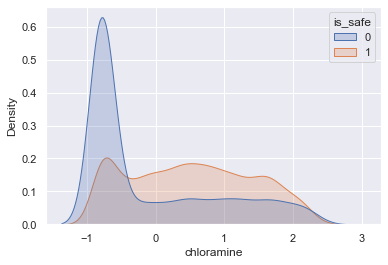

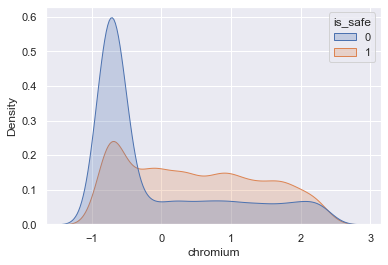

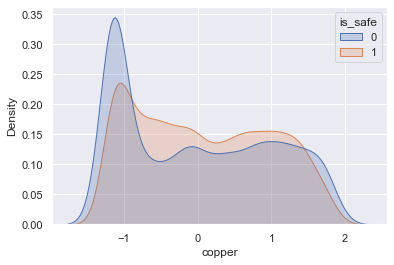

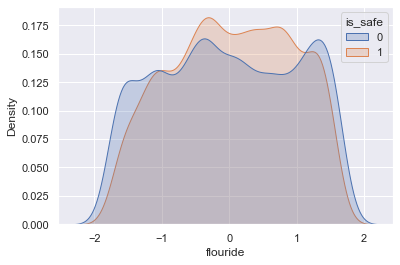

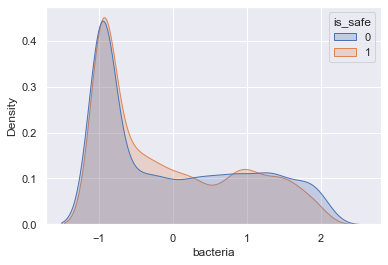

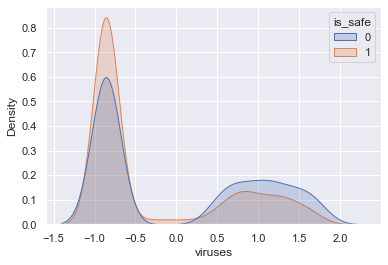

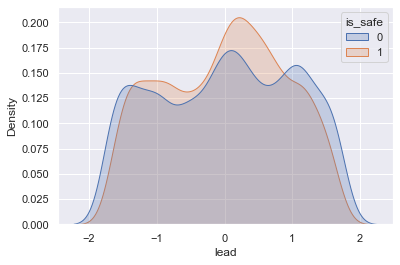

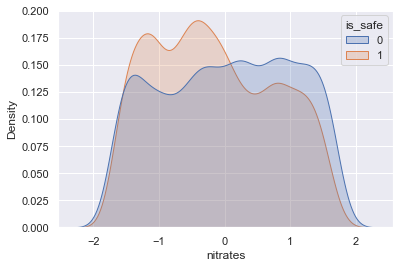

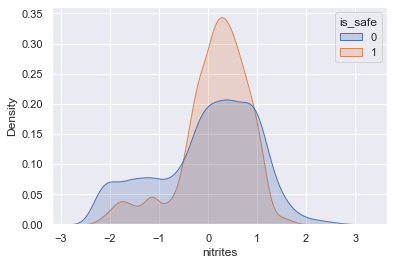

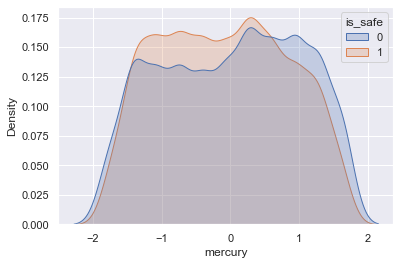

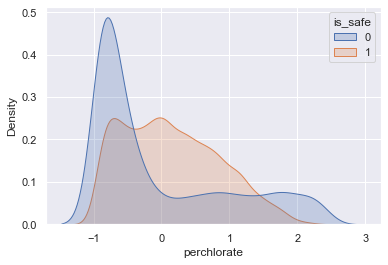

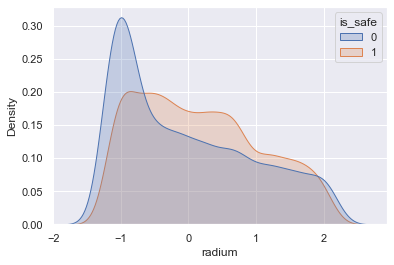

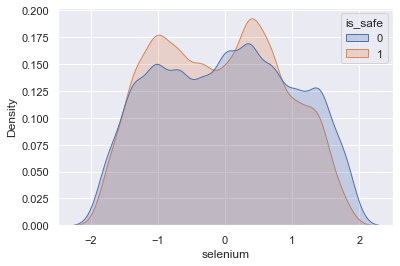

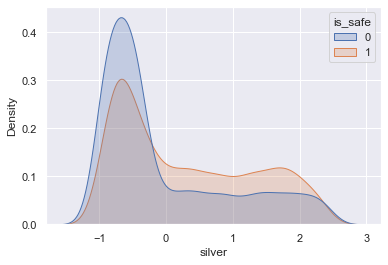

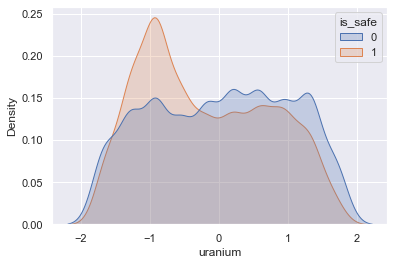

In [30]:
kdeplots(df4,df4["is_safe"])

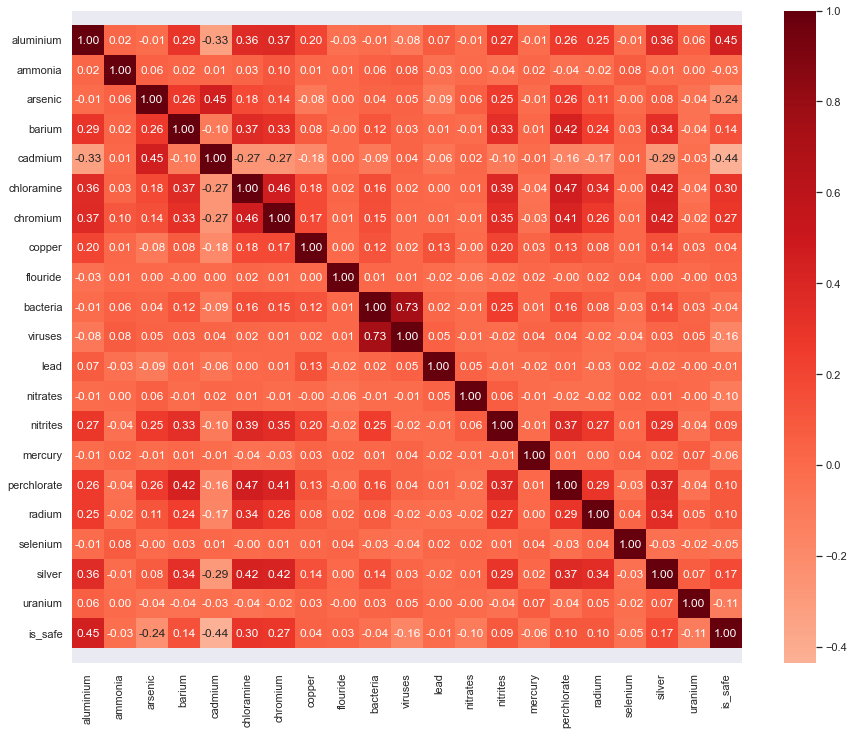

In [31]:
heatmaps(df4)

bacteria and viruses = 0.73


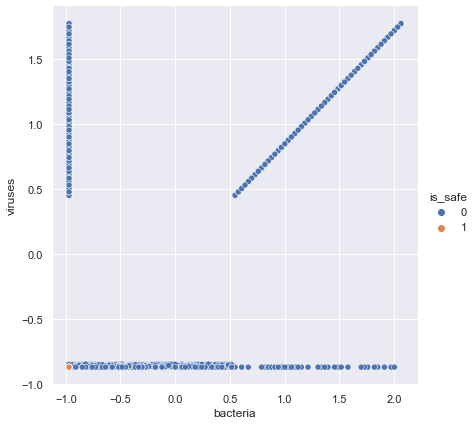

In [32]:
corplots4 = corplotsss()
corplots4.high_corr(df4)
corplots4.high_corr_plot()

KeyboardInterrupt: 

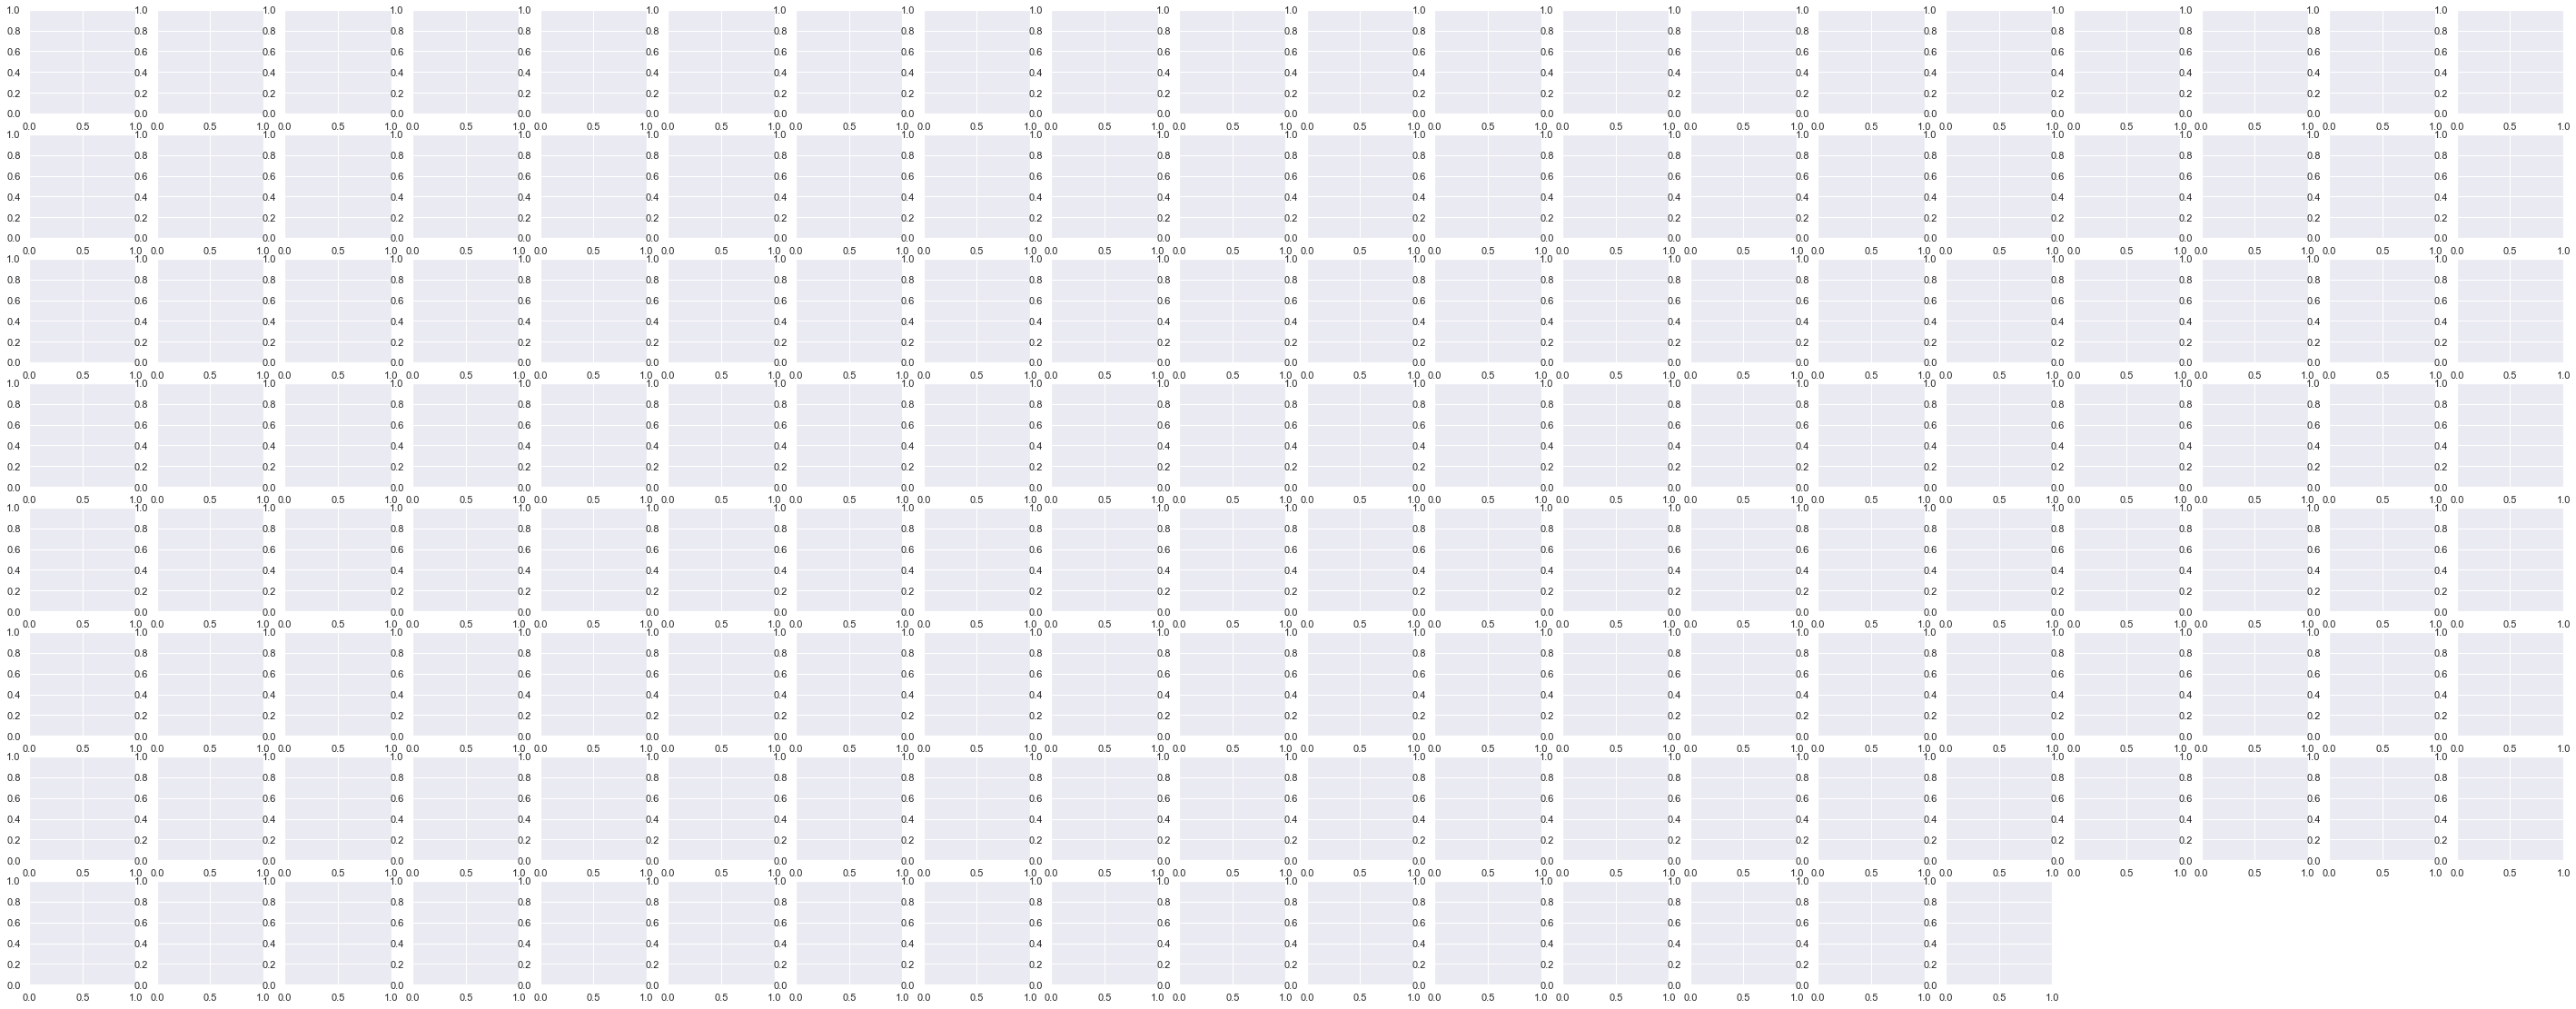

In [33]:
sns.pairplot(df, hue="is_safe")
plt.savefig("Water_Quality_Cleaned_Pairplot")

In [ ]:
sns.pairplot(df1, hue="is_safe")
plt.savefig("Water_Quality_Cleaned_Pairplot1")

In [ ]:
sns.pairplot(df2, hue="is_safe")
plt.savefig("Water_Quality_Cleaned_Pairplot2")

In [ ]:
sns.pairplot(df3, hue="is_safe")
plt.savefig("Water_Quality_Cleaned_Pairplot3")

In [ ]:
sns.pairplot(df4, hue="is_safe")
plt.savefig("Water_Quality_Cleaned_Pairplot4")